# Prosper Loan Dataset Exploration 
## By Prachi Pant

## Dataset Overview

> Following study explores a dataset containing Loan Data with many attributes like Borrower Rate , Estimated Effective Yield, LenderYield etc with over 100000 entries. This document explores this huge dataset and try to analyze its attrbutes and the correlation between them to find some conclusions.

> In this case study, we will analyze Prosper Loan Dataset where we look into various parameters which affect Loan effectiveness,Loan Risk,Borrower Rate, Lender's yield, profit/Loss and details about people who avail loan like their credit grades, Employment details etc. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

#### Loading the Dataset to skim through details

In [2]:
df_prosperLoan = pd.read_csv("prosperLoanData.csv")
df_prosperLoan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

#### Well Its a Huge Data set with 113937 entries 81 Columns and its bit intimidating to look at it first.

In [3]:
# high-level overview of data shape and composition

print(df_prosperLoan.shape)
print(df_prosperLoan.dtypes)
print(df_prosperLoan.head(10))

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   


#### On a quick look there are multiple columns which does not look relevant from investigation point of view and have many 0 values like : LP_CollectionFees  ,InvestmentFromFriendsAmount ,Recommendations,Recommendations etc

In [4]:
# descriptive statistics for numeric variables
print(df_prosperLoan.describe())


       ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.

### Quick Observation : 
#### avg prosper rating is around 4. 
#### Avg Estimated return (0.096068) is higher than avg EstimatedLoss (0.080306)
#### Avg Term is around 40 months



### Some Cleaning 

In [5]:
# Creating a Copy of original dataframe so that the original stays entact
df_loanCopy = df_prosperLoan.copy()

#### Fetching just the date from the ListingCreationDate and ClosedDate

In [6]:
new = df_loanCopy["ListingCreationDate"].str.split(" ", n = 1, expand = True)
df_loanCopy["CreationDate"]= new[0]
df_loanCopy = df_loanCopy.drop(["ListingCreationDate"], axis = 1)

new2 = df_loanCopy["ClosedDate"].str.split(" ", n = 1, expand = True)
df_loanCopy["ClosingDate"]= new2[0]
df_loanCopy = df_loanCopy.drop(["ClosedDate"], axis = 1)

# Testing the changes done with the Head command
df_loanCopy.head(2)


,ListingKey,ListingNumber,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,...,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,CreationDate,ClosingDate
0,1021339766868145413AB3B,193129,C,36,Completed,0.16516,0.158,0.138,NaN,NaN,...,0.0,0.0,0.0,1.0,0,0,0.0,258,2007-08-26,2009-08-14
1,10273602499503308B223C1,1209647,NaN,36,Current,0.12016,0.092,0.082,0.0796,0.0249,...,0.0,0.0,0.0,1.0,0,0,0.0,1,2014-02-27,NaN


#### Converting Creation Date , Closing Date to DateTime and calculate Time taken to close the loan

In [7]:
df_loanCopy['CreationDate']=pd.to_datetime(df_loanCopy['CreationDate'])
df_loanCopy['ClosingDate']=pd.to_datetime(df_loanCopy['ClosingDate'])
df_loanCopy['TimeToClose']=df_loanCopy['ClosingDate']-df_loanCopy['CreationDate']

df_loanCopy['TimeToClose'].describe()

count                       55089
mean     601 days 08:55:35.925502
std      356 days 05:58:15.945864
min          -1382 days +00:00:00
25%             296 days 00:00:00
50%             535 days 00:00:00
75%             957 days 00:00:00
max            2019 days 00:00:00
Name: TimeToClose, dtype: object

#### Thus the Mean time to close the Loan is 601 Days 

### Quick Observation while just skimmimg through the Data : 
> 1. Its a Huge Data set with 113937 entries 81 Columns
> 2. avg prosper rating is around 4. 
> 3. Avg Estimated return (0.096068) is higher than avg EstimatedLoss (0.080306)
> 4. Avg Term is around 40 months
> 5. Mean time to close the Loan is 601 Days 


### Main feature(s) of interest in this dataset : 
>1. What is the Maximum Borrower Rate and how is its distribution ?
>2. What is the Maximum Estimated Effective Yield and how is its distribution across ?
>3. How much is the Maximum Estimated loss and Maximum Estimated Returns 
>4. What are the various Loan Status and which kind of Loans are in Highest/Lowest number ?
>5. What is the employment status of Loan Borrowers and how many of the loan borrowers own home ?
>6. Does people with lower Salary or with higher salary tend to avail more loans what is the average monthly loan payment for each of them ?
>7. What is the Correlation between Lender Yield and Borrower Rate ?
>8. Does Borrower Rate , Lenders Yield , Estimated Returns depends on the income range of the people availing Loan?
>9. Who are the people with Higher Credit Grade and Lower Dept to Income Ratio ?
>10. Does Borrower rate influences Estimated Returns and Prosper Score ?
>11. Does Monthly salary of a person determines if its Risky Loan ? 



### Features in the dataset which I think will help support my investigation are : 

> CreditGrade, Term, Loan Status , Borrower Rate, Lender Yield, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, ProsperRating, EmploymentStatus, IncomeRange, StatedMonthlyIncome, TotalProsperLoans

## Univariate Exploration

In [8]:
df_loanCopy.Term.unique()

array([36, 60, 12], dtype=int64)

### Few Trivial Questions and Answers for Univariate Variable




#### What all Terms are available to avail the Loan and which one is the most popular choice

Text(0.5, 1.0, 'Terms available to avail Loan')

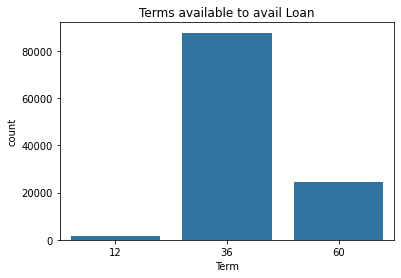

In [9]:
base_color = sb.color_palette()[0]
sb.countplot(x=df_loanCopy['Term'],data=df_prosperLoan, color = base_color);
plt.title ("Terms available to avail Loan")

#### There are three terms options available i.e 36, 60, 12 Months but most commonly the Loan is availed for 36 Months Period after that people tend to avail loan for 60 Months Period which seems to be large duration and the least popular term is 12 months very rarely people choose for this option.

#### What are most common Prosper ratings given 

Text(0.5, 1.0, 'Top 5 most common Prosper Ratings')

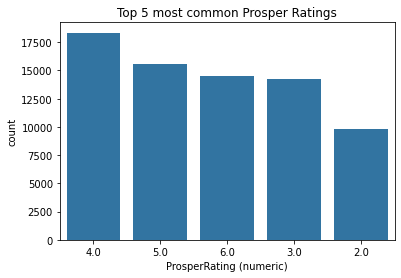

In [10]:
base_color = sb.color_palette()[0]
freq = df_loanCopy['ProsperRating (numeric)'].value_counts()
gen_order = freq.iloc[:5].index

sb.countplot (x=df_loanCopy['ProsperRating (numeric)'], data=df_loanCopy, color = base_color, order=gen_order);
plt.title ("Top 5 most common Prosper Ratings")

#### Thus most common rating is 4 


#### What are the Top 5 Quaters over the Years where the Loans were availed to the Max

Text(0.5, 1.0, 'Top 5 Quaters for which Max Loan records are available')

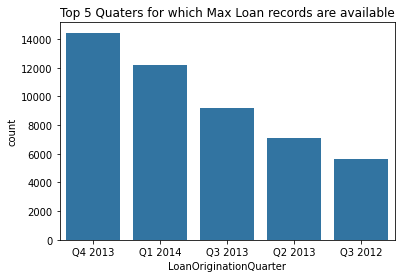

In [11]:
base_color = sb.color_palette()[0]
freq = df_loanCopy['LoanOriginationQuarter'].value_counts();
gen_order = freq.iloc[:5].index

sb.countplot (x=df_loanCopy['LoanOriginationQuarter'], data=df_loanCopy, color = base_color, order=gen_order);
plt.title ("Top 5 Quaters for which Max Loan records are available")

#### Maximum Loans were from 2012 Q3 to 2014 Q1 
#### Maximum Loan availed in 2013 Q4 

#### Zooming it a bit 

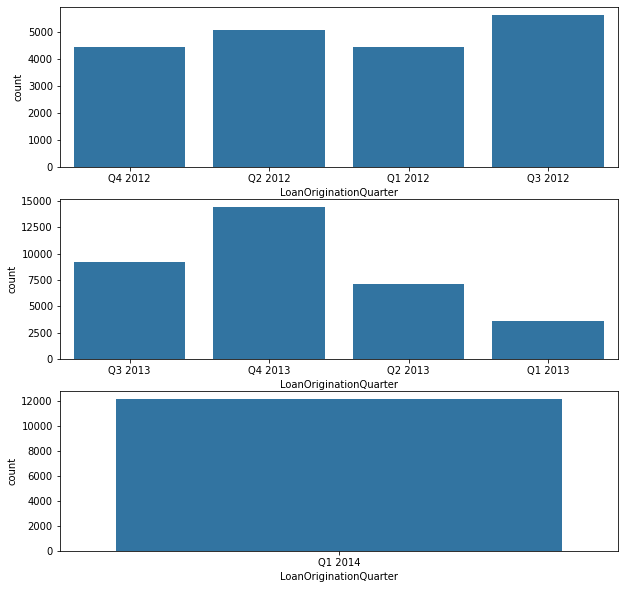

In [12]:
fig, ax = plt.subplots(nrows=3, figsize = [10,10])
default_color = sb.color_palette()[0]



base_color = sb.color_palette()[0]
freq2013 = df_loanCopy[df_loanCopy['LoanOriginationQuarter'].str.contains("2013")]
freq2014 = df_loanCopy[df_loanCopy['LoanOriginationQuarter'].str.contains("2014")]
freq2012 = df_loanCopy[df_loanCopy['LoanOriginationQuarter'].str.contains("2012")]
sb.countplot (x=freq2012['LoanOriginationQuarter'], data=freq2012, color = base_color, ax = ax[0]);
sb.countplot (x=freq2013['LoanOriginationQuarter'], data=freq2013, color = base_color, ax = ax[1]);
sb.countplot (x=freq2014['LoanOriginationQuarter'], data=freq2014, color = base_color, ax = ax[2]);


#### Thus the trend of availing the loan in these years (2012,2013, 2014 ) with each consecutive quater is on consistent increase. 
#### Surprisingly the Loan data for FY 2014 is showing just for Q1 so either the data is missing or most of the laons are availaed in Q1

#### Which state has higest loan lending data and what are the top 5 states with highest lending records

Text(0.5, 1.0, 'Top 5 States with maximum no. of Loan Records')

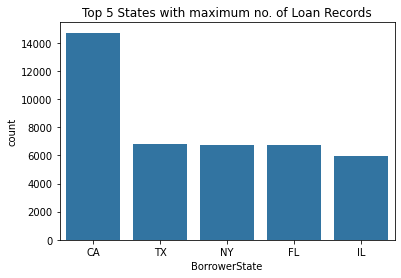

In [13]:
base_color = sb.color_palette()[0]
freq = df_loanCopy['BorrowerState'].value_counts()
gen_order = freq.iloc[:5].index

sb.countplot (x=df_loanCopy['BorrowerState'], data=df_loanCopy, color = base_color, order=gen_order);
plt.title ("Top 5 States with maximum no. of Loan Records")

#### Top 5 states with Highest lending records are : CA(Highest), TX, NY, FL, IL
#### CA has max loans lending data records though rest other states are almost equal records

In [14]:
df_loanCopy.head (1)

,ListingKey,ListingNumber,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,...,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,CreationDate,ClosingDate,TimeToClose
0,1021339766868145413AB3B,193129,C,36,Completed,0.16516,0.158,0.138,NaN,NaN,...,0.0,0.0,1.0,0,0,0.0,258,2007-08-26,2009-08-14,719 days


#### Checking Few Univariate Distributions

#### Explore the distribution of Borrower Rate

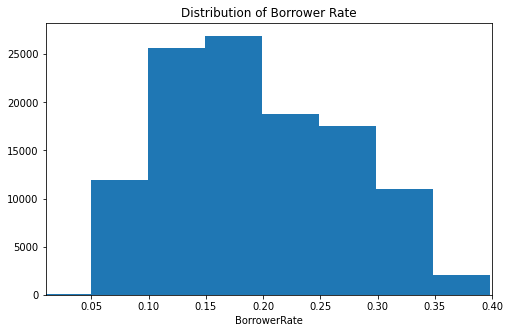

In [15]:
log_binsize = 0.05
bins = 10 ** np.arange(2.4, np.log10(df_loanCopy['EstimatedEffectiveYield'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loanCopy, x = 'BorrowerRate');
plt.xlim([0.01,0.4])
plt.xlabel('BorrowerRate')
plt.title ("Distribution of Borrower Rate")
plt.show()

#### Thus Maximum Borrower Rate is between 0.1 to 0.2
#### As the Borrower rate increases from 0.2 we can see a consistent fall on the graph 

#### Distribution of Estimated Effective yield

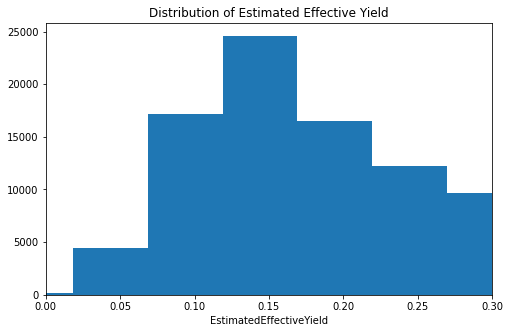

In [61]:
log_binsize = 0.05
plt.figure(figsize=[8, 5])
plt.hist(data = df_loanCopy, x = 'EstimatedEffectiveYield');
plt.xlabel('EstimatedEffectiveYield')
plt.xlim([0,0.30])
plt.title ("Distribution of Estimated Effective Yield")
plt.show()


#### Estimated Yield is Max from  0.12 - 0.17
#### Estimated Yield tends to drop ~1.18 onwards  which means that there are much lesser chances to get Estimated Yield of 0.2 to 0.3

#### Distribution of Estimated Loss 

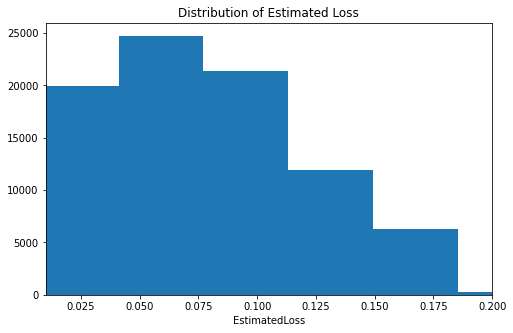

In [17]:
log_binsize = 0.05
bins = 10 ** np.arange(2.4, np.log10(df_loanCopy['EstimatedLoss'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loanCopy, x = 'EstimatedLoss');
plt.xlabel('EstimatedLoss')
plt.xlim([0.01,0.2])
plt.title ("Distribution of Estimated Loss")
plt.show()



#### Maximum estimated loss is ~0.03 to 0.08 however after ~0.08 the estimated Loss tends to fall drastically
#### Its very unlikely to get the Estimated Loss beyond ~0.18

#### Estimated Yield is Max at (0.12 - 0.17) and Maximum estimated loss is ~(0.03 to 0.08)
#### This very clearly states that in Loan business Estimated Yield tends to be much higher than the estimated Loss 


#### Distribution of Estimated Returns

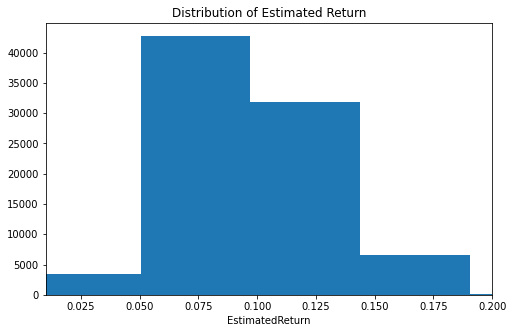

In [18]:
log_binsize = 0.01
bins = 10 ** np.arange(2.4, np.log10(df_loanCopy['EstimatedReturn'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df_loanCopy, x = 'EstimatedReturn');
plt.xlim([0.01,0.2])
plt.xlabel('EstimatedReturn')
plt.title ("Distribution of Estimated Return")
plt.show()


#### Estimated returns is max at ~(0.05 - 0.1 ) 
#### There is a steep decline of Estimated Return from 0.14 - 0.15

#### What are various Loan Status available for any Loan and how much records are available for each one of them ?

In [19]:
na_counts = df_loanCopy['LoanStatus'].value_counts()
print(na_counts)


Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64


#### Since there are many past due values and the count plot built for it was not clear thus thus combining all of them as one 

In [20]:
# Replacing all past due values with "Past Due "
df_loanCopy['LoanStatus']=df_loanCopy['LoanStatus'].apply(lambda x:'Past Due' if 'Past' in x else x)

In [21]:
na_counts = df_loanCopy['LoanStatus'].value_counts()
print(na_counts)

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due                   2067
FinalPaymentInProgress      205
Cancelled                     5
Name: LoanStatus, dtype: int64


#### Thus the maximum loans are in Current state (56576) followed by Completed Loans (38074) and almost negligible Loans are in Cancelled State (5)
#### There are 5018 Defaulted Loans and 2067 Past Dues Loans

#### Plotting the data in Bar Chart for better Visualization 

c:\users\ic020345\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


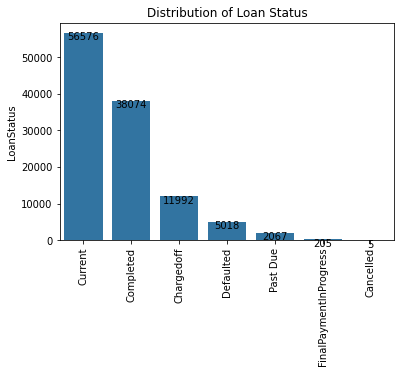

In [22]:
base_color = sb.color_palette()[0]
sb.barplot(na_counts.index.values, na_counts, color = base_color);

# get the current tick locations and labels
plt.xticks(rotation=90) 
plt.title ("Distribution of Loan Status")

# Logic to print value on each bar
for i in range (na_counts.shape[0]):
    count = na_counts[i]
    plt.text(i, count+300, count, ha = 'center', va='top');

#### Thus appx 50% Loans are in Current state, 
#### appx 33 % Loans are completed
#### appx 10% Loans are charged off
#### appx 4% are Defaulted
#### appx 2% are Past Due
#### and almost negligible loans are cancelled

#### Some data related to the people availing Loan 

#### What is the employment status of Loan Borrowers and how many of the loan borrowers have home

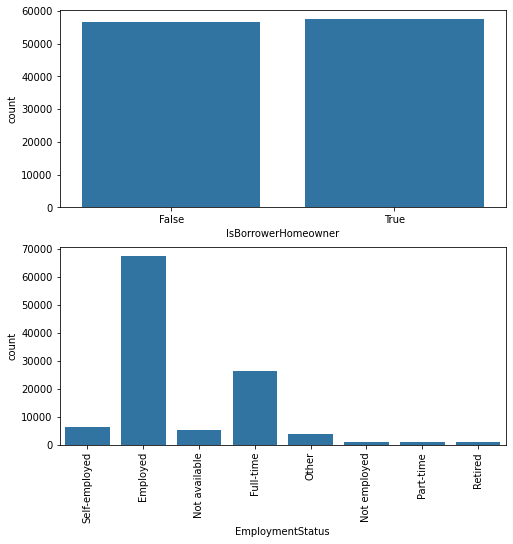

In [23]:
# Plotting a count plot for EmploymentStatus, IsBorrowerHomeowner
fig, ax = plt.subplots(nrows=2, figsize = [8,8])
default_color = sb.color_palette()[0]
sb.countplot(data = df_loanCopy, x = 'IsBorrowerHomeowner', color = default_color, ax = ax[0])
sb.countplot(data = df_loanCopy, x = 'EmploymentStatus', color = default_color, ax = ax[1])


plt.xticks(rotation=90)
plt.show()

#### Thus it looks like almost 50% of of people who avail loan already are home owners
#### Employee status is mostly employed where maximum people are full time employee and retired and not employed usually do not prefer to take loan which is kind of understanble

#### Check the Distribution of EstimatedLoss, EstimatedReturn, and EstimatedEffectiveYield in subplots to Visualize better and to make some interpretation

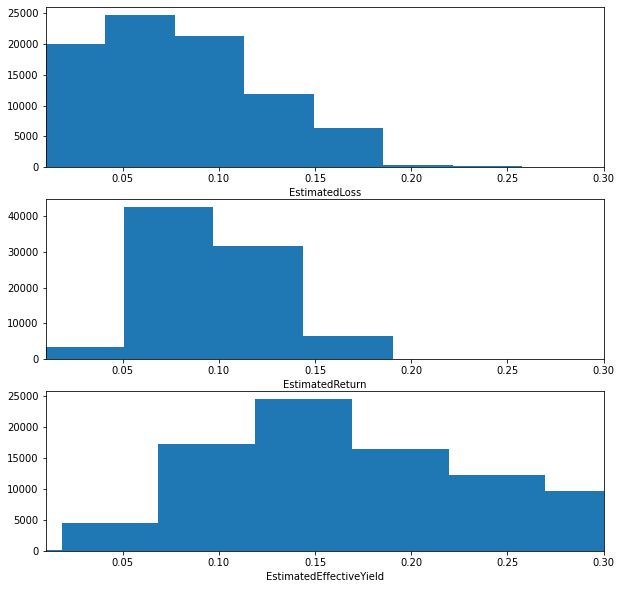

In [62]:
# Plot the distribution of EstimatedLoss, EstimatedReturn, and EstimatedEffectiveYield.
fig, ax = plt.subplots(nrows=3, figsize = [10,10])

variables = ['EstimatedLoss', 'EstimatedReturn', 'EstimatedEffectiveYield']
for i in range(len(variables)):
    var = variables[i]
    
    ax[i].hist(data = df_loanCopy, x = var)
    ax[i].set_xlabel('{}'.format(var))
 For EstimatedEffectiveYield values ranges till 0.3 so zoom it as per the data
    if (var == "EstimatedEffectiveYield"):
         ax[i].set_xlim([0.01,0.3])
         
    else :
         ax[i].set_xlim([0.01,0.3])
         
plt.show()

## Univariate Exploration Key Points

### Distribution(s) of few parameters of interest and the answers of the questions that we took before starting our analysis

##### What are the terms available while taking Loan and which one is more popular
there are three terms options available i.e 36, 60, 12 Months but most commonly the Loan is availed for 36 Months Period after that people tend to avail loan for 60 Months Period which seems to be large duration and the least popular term is 12 months very rarely people choose for this option.¶

#####  What are most common ratings given 
most popular rating is 4 while 2 is the least common rating

#####  What are the Top 5 Quaters over the Years where the Loans was availed to the Max
Maximum Loans were from 2012 Q3 to 2014 Q1 
Maximum Loan availed in 2013 Q4 
On a Closer Look following two things were found
Trend of availing the loan in these years (2012,2013, 2014 ) with quater is on consistent increase. 
Surprisingly the Loan data for FY 2014 is showing just for Q1 so either the data is missing or most of the laons are availaed in Q1

##### Which state has higest loan lending data and what are the top 5 states with highest lending records
CA has max loans lending data rest other states are almost equally distributed
Top 5 states with Highest lending records are : CA(Highest), TX, NY, FL, IL


#####  Explore the distribution of Borrower Rate
Thus Maximum Borrower Rate is between 0.1 to 0.2
As the Borrower rate increases from 0.2 we can see a consistent fall on the graph

#####  Distribution of Estimated Effective yield
Estimated Yield is Max from  0.12 - 0.17
Estimated Yield tends to drop ~1.18 onwards  which means that there are much lesser chances to get Estimated Yield of 0.2 to 0.3

##### Distribution of Estimated Loss 
Maximum estimated loss is ~0.03 to 0.08 however after ~0.08 the estimated Loss tends to fall drastically
Its very unlikely to get the Estimated Loss beyond ~0.18

##### Estimated Yield is Max at (0.12 - 0.17) and Maximum estimated loss is ~(0.03 to 0.08) This very clearly states that in Loan business Estimated Yield tends to be much higher than the estimated Loss 

#### Distribution of Estimated Returns
Estimated returns is max at ~(0.05 - 0.1 ) 
There is a steep decline of Estimated Return from 0.14 - 0.15


#####  What are various Loan Status their numbers
The maximum loans are in Current state (56576) followed by Completed Loans (38074) and almost negligible Loans are in Cancelled State (5)
There are 5018 Defaulted Loans and 2067 Past Dues Loans

Appx 50% Loans are in Current state, 
Appx 33 % Loans are completed
Appx 10% Loans are charged off
Appx 4% are Defaulted
Appx 2% are Past Due
Almost negligible loans are cancelled


#####  What is the employment status of Loan Borrowers and how many of the loan borrowers have home
Thus it looks like almost 50% of of people who avail loan already are home owners
Employee status is mostly employed where maximum people are full time employee and retired and not employed usually do not prefer to take loan which is kind of understandable

## Bivariate Exploration

#### How is the Spread across Estimated Loss and Estimated Return

Text(0.5, 1.0, 'Distribution of Estimated Loss and Estimated Return')

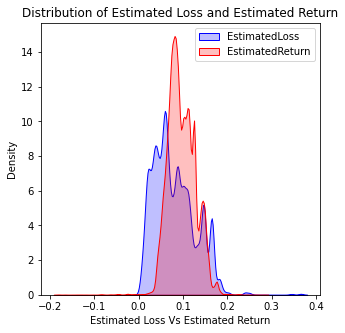

In [25]:
plt.figure(figsize=(5,5))
sb.kdeplot(df_loanCopy['EstimatedLoss'], label = "Loss", shade = True, color = 'b');
sb.kdeplot(df_loanCopy['EstimatedReturn'], label = "Return", shade = True, color = 'r');

plt.legend( ['EstimatedLoss', 'EstimatedReturn'])
plt.xlabel("Estimated Loss Vs Estimated Return");
plt.title ("Distribution of Estimated Loss and Estimated Return")

#### Estimated Return is usually higher than the Estimated Loss 
#### Peak of Estimated Return is much higher than the peak of Estimated Loss

#### How is the spread across for TotalProsperPaymentsBilled and OnTimeProsperPayments

Text(0.5, 1.0, 'Distribution of Total Prosper Payments Billed Vs On Time Prosper Payments')

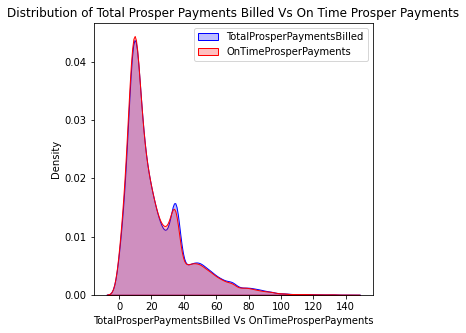

In [26]:

plt.figure(figsize=(5,5))
sb.kdeplot(df_loanCopy['TotalProsperPaymentsBilled'], label = "TotalProsperPaymentsBilled", shade = True, color = 'b');
sb.kdeplot(df_loanCopy['OnTimeProsperPayments'], label = "OnTimeProsperPayments", shade = True, color = 'r');

plt.legend( ['TotalProsperPaymentsBilled', 'OnTimeProsperPayments'])

plt.xlabel("TotalProsperPaymentsBilled Vs OnTimeProsperPayments");
plt.title ("Distribution of Total Prosper Payments Billed Vs On Time Prosper Payments")

#### Total Prosper Payment Billed and On Time Prosper Payment graph tends to overlap which is kind of expected thats why these loans are called prosper loans as the timely payment is done for almost all of them

#### Classifying the Financial Category Based on the Stated Monthly Income
#### People with salary under 5000 are in Poor Category, 5k-10k are Lower Middle, 10k-25k are Upper Middle, and all above as Rich

In [27]:
sal_bins=[0,5000,10000,25000,np.inf]
cat_labels = ["Poor","Lower Middle","Upper Middle","Rich"]

In [28]:
df_loanCopy['Financial_Category']=pd.cut(df_loanCopy['StatedMonthlyIncome'],bins=sal_bins,labels=cat_labels)

In [29]:
df_loanCopy['Financial_Category']=df_loanCopy['Financial_Category'].astype(pd.api.types.CategoricalDtype(ordered = True, categories = cat_labels))

#### Checking that a new column Financial Category is added to the dataset

In [30]:
df_loanCopy.head(5)

,ListingKey,ListingNumber,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,...,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,CreationDate,ClosingDate,TimeToClose,Financial_Category
0,1021339766868145413AB3B,193129,C,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,...,0.0,1.0,0,0,0.0,258,2007-08-26,2009-08-14,719 days,Poor
1,10273602499503308B223C1,1209647,NaN,36,Current,0.12016,0.0920,0.0820,0.07960,0.0249,...,0.0,1.0,0,0,0.0,1,2014-02-27,NaT,NaT,Lower Middle
2,0EE9337825851032864889A,81716,HR,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,...,0.0,1.0,0,0,0.0,41,2007-01-05,2009-12-17,1077 days,Poor
3,0EF5356002482715299901A,658116,NaN,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,...,0.0,1.0,0,0,0.0,158,2012-10-22,NaT,NaT,Poor
4,0F023589499656230C5E3E2,909464,NaN,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,...,0.0,1.0,0,0,0.0,20,2013-09-14,NaT,NaT,Lower Middle


#### Checking the Distribution of Financial Category

Text(0, 0.5, 'No. Of People under each Category')

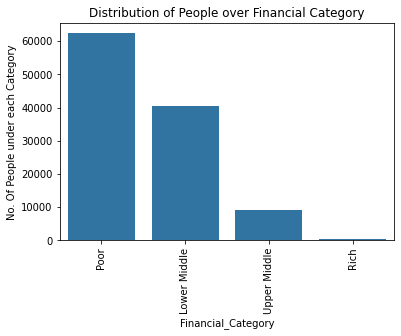

In [31]:
base_color = sb.color_palette()[0]
plt.xticks(rotation=90)

freq = df_loanCopy['Financial_Category'].value_counts()
gen_order = freq.iloc[:5].index
sb.countplot(data=df_loanCopy, x='Financial_Category', color=base_color, order = gen_order);
plt.title ("Distribution of People over Financial Category")
plt.ylabel("No. Of People under each Category")

#### Thus people (Poor Category) with Salary (0-5000) are exponentially high in numbers than the Rich Category with Salary over 25k

#### Monthly Loan Payment by various Financial Category

In [32]:
df_subset1 = df_loanCopy[['MonthlyLoanPayment','Financial_Category']]
df_subset1.groupby('Financial_Category').mean()


,MonthlyLoanPayment
Financial_Category,
Poor,213.876838
Lower Middle,324.556464
Upper Middle,434.417352
Rich,496.504426


#### Avg. Monthly Loan payment by the Poor category is much lower even when the no. of people availing Loan in this category is much higher

#### Checking this data with the line chart for better Visualization

c:\users\ic020345\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0.5, 1.0, 'Monthly Loan Payment by Various Financial Category')

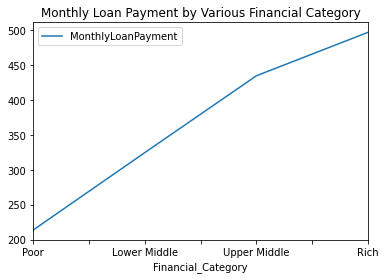

In [33]:
df_subset1.groupby('Financial_Category').mean().plot(legend=True)
plt.title ("Monthly Loan Payment by Various Financial Category")

#### Thus as expected Monthly Loan Payment for Poor is much lower than the people with higher income Range

#### Check the Monthly Stated Income for these Financial Category

In [34]:
df_subset2 = df_loanCopy[['StatedMonthlyIncome','Financial_Category']]
df_subset2.groupby('Financial_Category').mean()


,StatedMonthlyIncome
Financial_Category,
Poor,3310.113753
Lower Middle,6963.955631
Upper Middle,13631.147133
Rich,47338.269146


c:\users\ic020345\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0.5, 1.0, 'Distribution of Stated Monthly income of Various Financial Category')

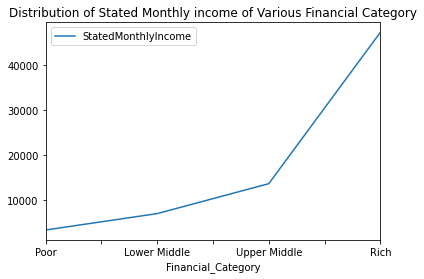

In [35]:
df_subset2.groupby('Financial_Category').mean().plot(legend=True);
plt.title ("Distribution of Stated Monthly income of Various Financial Category")

#### Poor Category people availing Loan is much higher than the Rich Category still the avg stated Monthly Income for the Rich category is much higher. This shows a tremendous gap between the Rich and Poor Monthly income.

#### Check the Prosper Score for each category in Loan Status

Text(0, 0.5, 'Prosper Score')

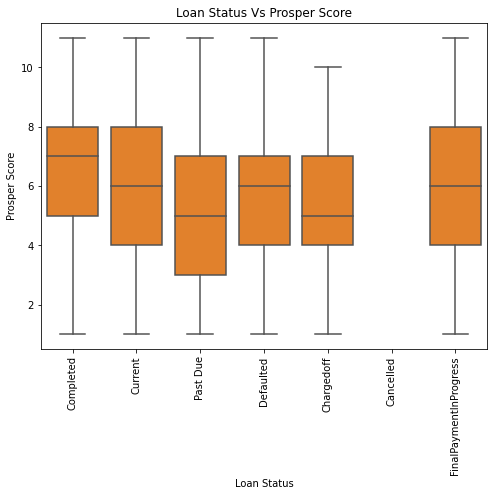

In [36]:

f, ax = plt.subplots(figsize=(8, 6))
sb.boxplot(data=df_loanCopy,x='LoanStatus',y='ProsperScore',color=sb.color_palette()[1]);
plt.xticks(rotation=90)
ax.set_title('Loan Status Vs Prosper Score')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Prosper Score')

#### Loan Status	Avg Prosper Score
#### Thus the avg Prosper Score for Completed	Loan is   > ~7
####  The avg Prosper Score for Current Loan is  ~6
####  The avg Prosper Score for Past DueLoan is  ~5
#### The avg Prosper Score for Defaulted Loan is  ~6
#### The avg Prosper Score for Charged Off Loan is  ~5
#### The avg Prosper Score for  Final Payment Progress 	Loan is  ~6

#### Thus for obvious reason the Prosper Score for people who have completed the Loan is Higher 

#### Whats is the Correlation between Open Revolving Accounts and Open Revolving Monthly Payment

Text(0, 0.5, 'OpenRevolvingMonthlyPayment')

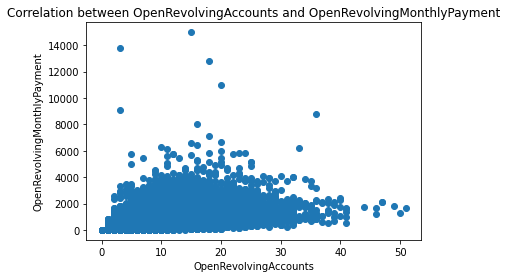

In [37]:
plt.scatter(df_loanCopy.OpenRevolvingAccounts, df_loanCopy.OpenRevolvingMonthlyPayment)
plt.title("Correlation between OpenRevolvingAccounts and OpenRevolvingMonthlyPayment")
plt.xlabel("OpenRevolvingAccounts")
plt.ylabel("OpenRevolvingMonthlyPayment")

#### As Expected there is a strong positive correlation between Open Revolving Accounts and Open Revolving Monthly Payment which means if the Open Revolving Accounts are more the Open Revolving Monthly Payments will also be higher

#### Check the Correlation between Lender Yield and Borrower Rate 

Text(0, 0.5, 'BorrowerRate')

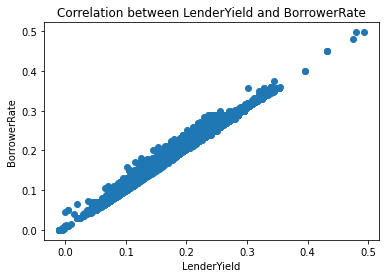

In [38]:
plt.scatter(df_loanCopy.LenderYield, df_loanCopy.BorrowerRate)
plt.title("Correlation between LenderYield and BorrowerRate")
plt.xlabel("LenderYield")
plt.ylabel("BorrowerRate")

#### Thus there is strong positive relation between the LenderYield and the Borrower rate i.e if the Borrower rate is high Lender's Yield is expected to be High which also makes sense
#### Borrower Rate is mostly lower than 0.35 it becomes rarer after it i.e having much higher Borrower rate is also not so common and mostly it stays between 0.1 to 0.3

#### Plot a Pair Grid to see the Correlation between BorrowerRate, LenderYield, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn

c:\users\ic020345\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\ic020345\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


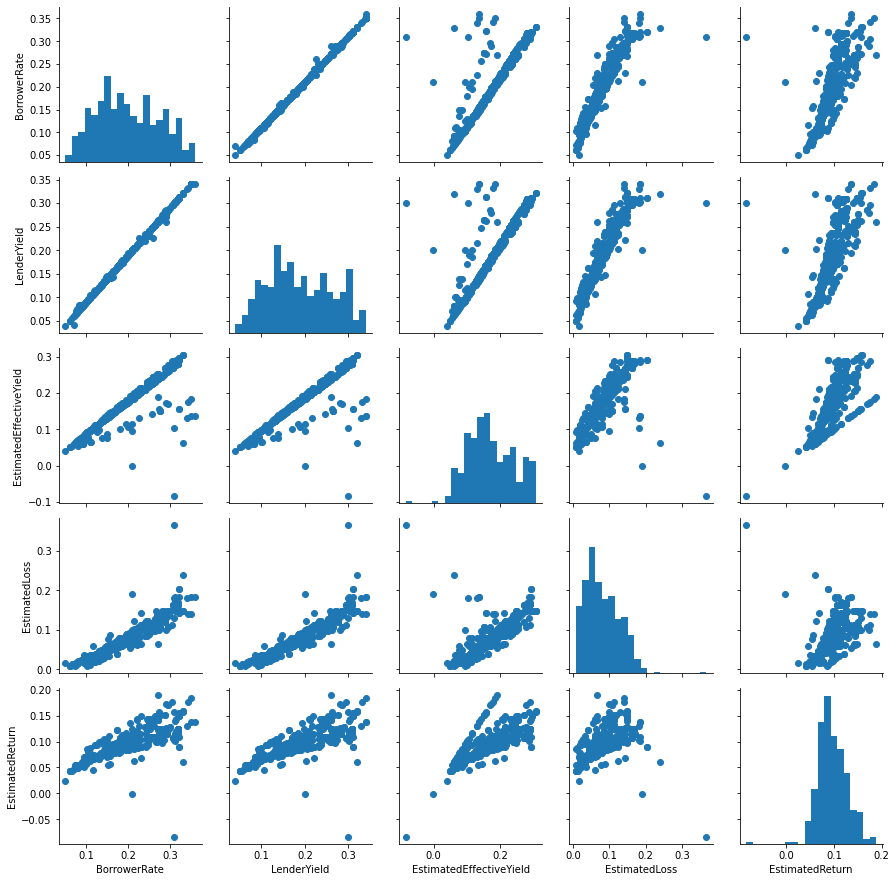

In [39]:
# plot matrix: sample 50000 Loan Records so that plots are clearer and
vars = ['BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn']

samples = np.random.choice(df_loanCopy.shape[0], 500, replace = False)
df_loanCopy_samp = df_loanCopy.loc[samples,:]

g = sb.PairGrid(data = df_loanCopy_samp, vars = vars);
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

In [40]:
#### Lender's Yield and Borrower Rate have strong positive Correlation 
#### Estimated Effective Yield has strong positive relation between Borrower Rate 
#### Estimated Loss has positive correlation between Borrower Rate 
#### Estimated Return has positive correlation between Borrower Rate

#### Lender's Yield from Different Income Range People 

c:\users\ic020345\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
c:\users\ic020345\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


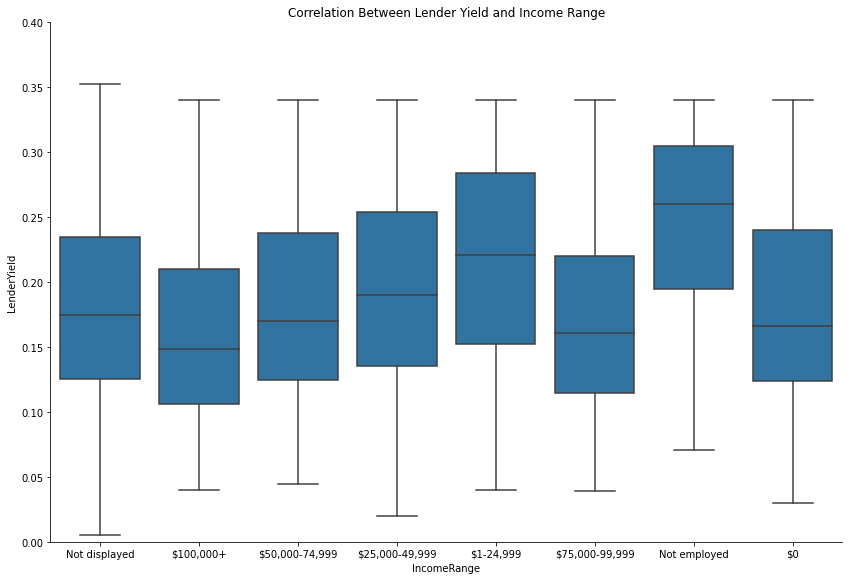

<Figure size 720x720 with 0 Axes>

In [66]:
# Plotting Box Plot 

samples = np.random.choice(df_loanCopy.shape[0], 10000, replace = False)
df_loanCopy_samp = df_loanCopy.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    

g = sb.PairGrid(data = df_loanCopy_samp, y_vars = ['LenderYield'], x_vars = ['IncomeRange'],
                size = 8, aspect = 1.5)
g.map(boxgrid)
plt.title("Correlation Between Lender Yield and Income Range")
plt.ylim(0,0.4)
plt.figure(figsize = [10, 10])
plt.show();

#### This Graph shows that as the Salary Range Increases the Lender's Yield decreases may be because the interest rates are higher for people with lower income range as its more risky to lend loan to such people. More interestingly the Lender's Yield is maximum for the unemployed people as for the same reason the risk of lending loan would be higher for unemployed and hence the interest rate would be higher increasing the Lender's Yield

#### Checking the Lender's Yield for each Finacial Category

c:\users\ic020345\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
c:\users\ic020345\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 360x360 with 0 Axes>

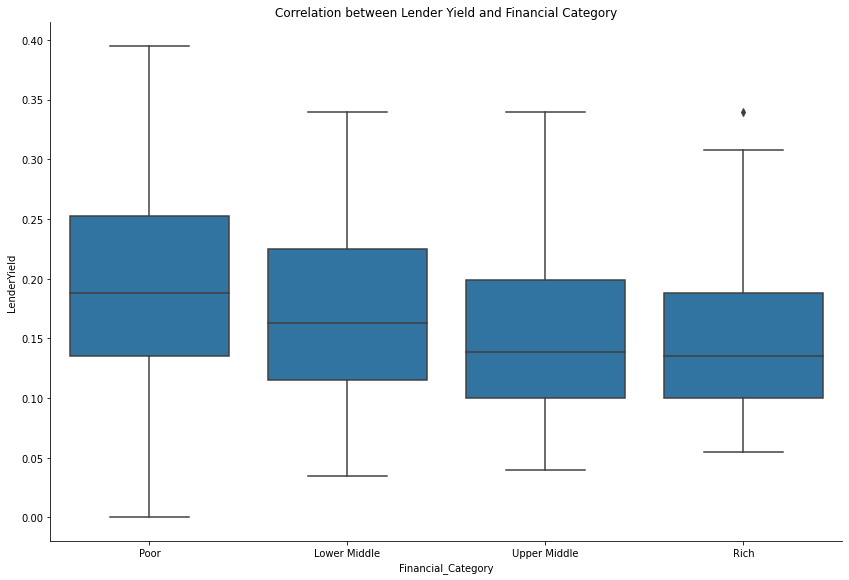

In [55]:
# Plotting Box Plot 

samples = np.random.choice(df_loanCopy.shape[0], 10000, replace = False)
df_loanCopy_samp = df_loanCopy.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [5, 5])
g = sb.PairGrid(data = df_loanCopy_samp, y_vars = ['LenderYield'], x_vars = ['Financial_Category'],
                size = 8, aspect = 1.5)
g.map(boxgrid)
plt.title ("Correlation between Lender Yield and Financial Category")
plt.show();

#### This plot shows that the Lender's Yield from the Poor Category is Maximum and that from the Rich Category is Minimum 

#### To check the correlation between various parameters : TimeToClose', 'CreditGrade', 'Term' , 'BorrowerRate',  'ProsperScore', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration','IsBorrowerHomeowner','DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years','IncomeRange'


In [43]:
df_subset = df_loanCopy[['TimeToClose', 'CreditGrade', 'Term' , 'BorrowerRate',  'ProsperScore', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration','IsBorrowerHomeowner','DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years','IncomeRange']]
df_subset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
TimeToClose                   55089 non-null timedelta64[ns]
CreditGrade                   28953 non-null object
Term                          113937 non-null int64
BorrowerRate                  113937 non-null float64
ProsperScore                  84853 non-null float64
BorrowerState                 108422 non-null object
Occupation                    110349 non-null object
EmploymentStatus              111682 non-null object
EmploymentStatusDuration      106312 non-null float64
IsBorrowerHomeowner           113937 non-null bool
DateCreditPulled              113937 non-null object
CreditScoreRangeLower         113346 non-null float64
CreditScoreRangeUpper         113346 non-null float64
CurrentCreditLines            106333 non-null float64
OpenCreditLines               106333 non-null float64
TotalCreditLinespast7years    113240 non-null float64
IncomeRange                   

Text(0.5, 1.0, 'Correlation between various Loan Dataset Parameters')

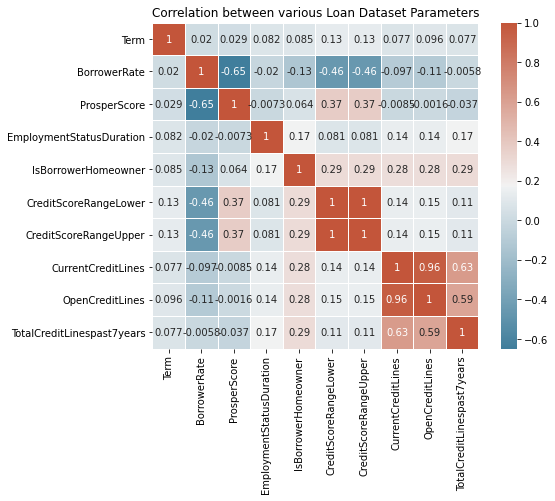

In [58]:
corr = df_subset.corr()
f, ax = plt.subplots(figsize=(8, 6))
cmap = sb.diverging_palette(230, 20, as_cmap=True)
sb.heatmap(corr, cmap=cmap,square=True, linewidths=.5, annot=True);
ax.set_title ("Correlation between various Loan Dataset Parameters")

#### ProsperScore and BorrowerRate have negative relation which implies people with with Good Prosper Score tend to get lower Borrower Rate
#### Current credit lines and Open credit lines have positive relationship
#### Current credit lines and Total Credit lines past 7 years have positive relationship

## Bivariate Exploration Key Points

### How is the Spread across for Estimated Loss and Estimated Return
#### Estimated Return is usually higher than the Estimated Loss 
#### Peak of Estimated Return is much higher than the peak of Estimated Loss

### How is the spread across for TotalProsperPaymentsBilled and OnTimeProsperPayments
#### Total Prosper Payment Billed and On Time Prosper Payment graph tends to overlap which is kind of expected thats why these loans are called prosper loans as the timely payment is done for almost all of them

### What is the Distribution for the various Financial Category
#### People (Poor Category) with Salary (0-5000)are exponentially higher in no. for availing the loan than the Rich Category with Salary over 25k



### What is the Monthly Loan Payment by various Financial Category
#### Avg. Monthly Loan payment by the Poor category is much lower even when the no. of people availing Loan in this category is much higher

### How is the Monthly Stated Income of these Financial Category
#### Poor Category people availing Loan is much higher than the Rich Category still the avg stated Monthly Income for the Rich category is much higher. This shows a tremendous gap between the Rich and Poor Monthly income.




### What is the Prosper Score for each category in Loan Status
#### Loan Status	Avg Prosper Score
#### Thus the avg Prosper Score for Completed	Loan is   > ~7
####  The avg Prosper Score for Current Loan is  ~6
####  The avg Prosper Score for Past DueLoan is  ~5
#### The avg Prosper Score for Defaulted Loan is  ~6
#### The avg Prosper Score for Charged Off Loan is  ~5
#### The avg Prosper Score for  Final Payment Progress 	Loan is  ~6
#### Thus for obvious reason the Prosper Score for people who have completed the Loan is Higher 


### Whats is the Correlation between Open Revolving Accounts and Open Revolving Monthly Payment
#### As Expected there is a strong positive correlation between Open Revolving Accounts and Open Revolving Monthly Payment which means if the Open Revolving Accounts are more the Open Revolving Monthly Payments will also be higher

### What is the Correlation between Lender Yield and Borrower Rate 
#### Thus there is strong positive relation between the LenderYield and the Borrower rate i.e if the Borrower rate is high Lender's Yield is expected to be High which also makes sense
#### Borrower Rate is mostly lower than 0.35 it becomes rarer after it i.e having much higher Borrower rate is also not so common and mostly it stays between 0.1 to 0.3




### What is the Lender's Yield from Different Income Range People 
#### Analysis shows that as the Salary Range Increases the Lender's Yield decreases may be because the interest rates are higher for people with lower income range as its more risky to lend loan to such people. More interestingly the Lender's Yield is maximum for the unemployed people as for the same reason the risk of lending loan would be higher for unemployed and hence the interest rate would be higher increasing the Lender's Yield

### How is the Lender's Yield from each Finacial Category
#### Analysis shows that the Lender's Yield from the Poor Category is Maximum and that from the Rich Category is Minimum this may be due to two reasons no. of people who availed loan from the poor category is exponentially higher and also the interest rate for people earning less will be higher as the risk to lend money is higher





### To check the correlation between various parameters : TimeToClose', 'CreditGrade', 'Term' , 'BorrowerRate',  'ProsperScore', 'BorrowerState', 'Occupation', 'EmploymentStatus' etc
#### ProsperScore and BorrowerRate have negative relation which implies people with with Good Prosper Score tend to get lower Borrower Rate
#### Current credit lines and Open credit lines have positive relationship
#### Current credit lines and Total Credit lines past 7 years have positive relationship


## Multivariate Exploration

#### To check if there is any correlation between Borrower Rate , Estimated Return and Financial Category

Text(0, 0.5, 'EstimatedReturn')

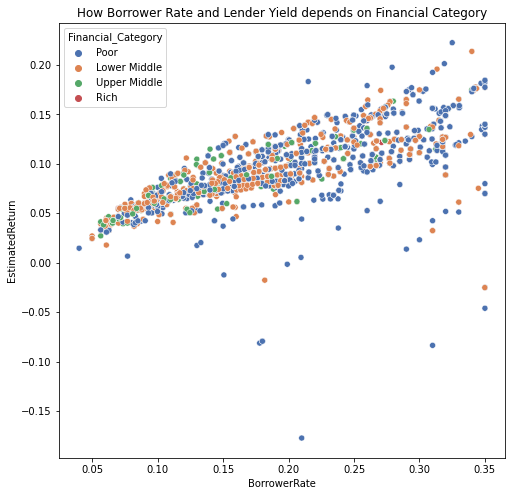

In [45]:
# Since the data is huge so for better understanding and visualization taking sample of data
samples = np.random.choice(df_loanCopy.shape[0], 10000, replace = False)
df_loanCopy_samp = df_loanCopy.loc[samples,:]

f, ax = plt.subplots(figsize=(8, 8))
sb.scatterplot(data=df_loanCopy_samp,x='BorrowerRate',y='EstimatedReturn',hue="Financial_Category",palette="deep")
ax.set_title('How Borrower Rate and Lender Yield depends on Financial Category')
ax.set_xlabel('BorrowerRate')
ax.set_ylabel('EstimatedReturn')

#### As the Financial Category improves from poor to Upper Middle the borrower rate reduces i.e for Poor category the Borrower rate is higher than Upper Middle Class
#### Estimated Returns from the Poor Category is High as the Borrower Rate is high for them

#### To check if there is any correlation between Borrower Rate , Dept To Income Ratio and Financial Category

Text(0, 0.5, 'DebtToIncomeRatio')

c:\users\ic020345\appdata\local\programs\python\python37\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


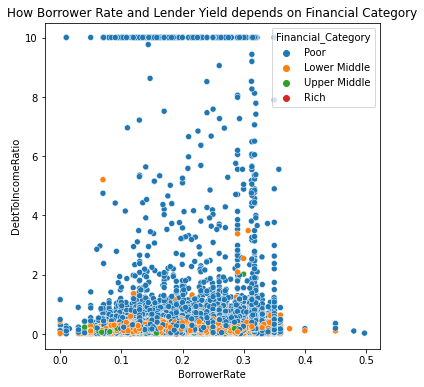

In [46]:
samples = np.random.choice(df_loanCopy.shape[0], 10000, replace = False)
df_loanCopy_samp = df_loanCopy.loc[samples,:]


f, ax = plt.subplots(figsize=(6, 6))
sb.scatterplot(data=df_loanCopy,x='BorrowerRate',y='DebtToIncomeRatio',hue='Financial_Category',hue_order = ['Poor', 'Lower Middle', 'Upper Middle', 'Rich'])
ax.set_title('How Borrower Rate and Lender Yield depends on Financial Category')
ax.set_xlabel('BorrowerRate')
ax.set_ylabel('DebtToIncomeRatio')


#### Dept to Income Ratio is quite high for the Poor class as compared to the Upper Middle Class people as expected and as the Borrower Rate increases this ratio increases exponentially

#### To check if there is any correlation between Stated Monthly Salary, Dept To Income Ratio, Credit Grade

(0.0, 55000.0)

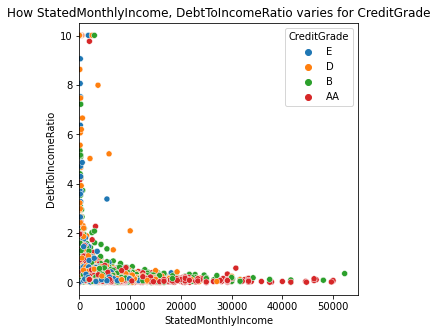

In [47]:
# For better Visualization and to check the trend I am taking just few Credit Grades 
newdf = df_loanCopy[(df_loanCopy.CreditGrade == "AA")| (df_loanCopy.CreditGrade == "B") | (df_loanCopy.CreditGrade == "D") | (df_loanCopy.CreditGrade == "E")]
f, ax = plt.subplots(figsize=(5, 5))
sb.scatterplot(data=newdf,x='StatedMonthlyIncome',y='DebtToIncomeRatio',hue='CreditGrade', hue_order = ['E','D','B','AA'])
ax.set_title('How StatedMonthlyIncome, DebtToIncomeRatio varies for CreditGrade')
ax.set_ylabel('DebtToIncomeRatio')
ax.set_xlabel('StatedMonthlyIncome')
ax.set_xlim(0,55000)

#### High Credit Grade People are usually with Higher salary range and with less DeptToIncomeRatio while the lower credit grade people have usually less income and hugher DeptToIncomeRatio This looks relatable

#### To check if there is any correlation between Borrower Rate , Estimated Return and Prosper Score

Text(0, 0.5, 'Estimated Return')

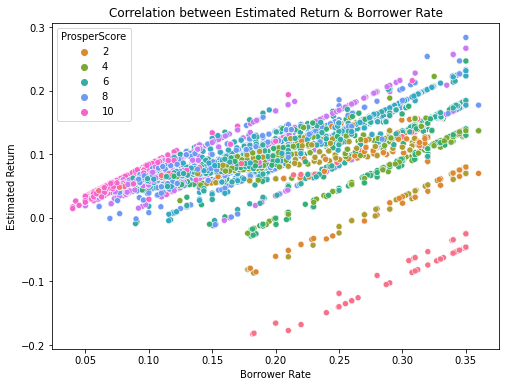

In [48]:
f, ax = plt.subplots(figsize=(8, 6))
sb.scatterplot(data=df_loanCopy,x='BorrowerRate',y='EstimatedReturn',hue="ProsperScore", palette='husl')
ax.set_title('Correlation between Estimated Return & Borrower Rate')
ax.set_xlabel('Borrower Rate')
ax.set_ylabel('Estimated Return')


#### Borrower rate influences Estimated Returns for sure but the Prosper Score demarcation is very significantly represented in this graph which shows that it also has a correlation with other two parameters
#### The lowest Borrower Rate(0.05-0.12) are with lowest risk score (Best Risk Score 10) and also the estimated Returns are reasonably good (upto 0.1)
#### For medium Risk Score (Prosper Score between 4-6) the Estimated Returns is Maximum (upto 0.2) and the Borrower rate is little higher (0.12 - 0.25)
#### For High Risk Score (Prosper Score 2) the Estimated Returns is very low and the Borrower rate is on higher range (0.2 - 0.35)


#### To check if there is any correlation between Income Range, Loan Status with Prosper Score

Text(0.5, 33.0, 'Loan Status')

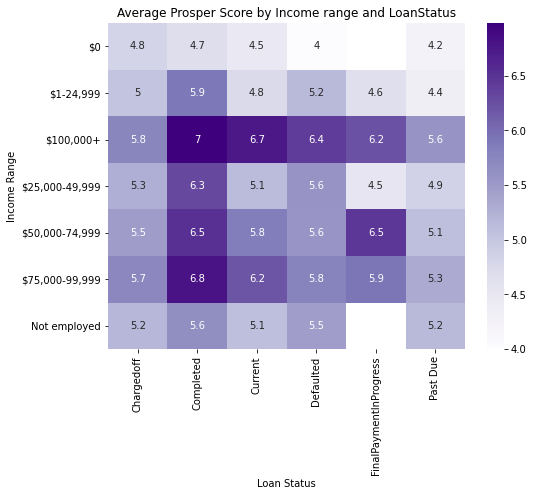

In [49]:
newdf = df_loanCopy[(df_loanCopy.IncomeRange != "Not displayed") & (df_loanCopy.LoanStatus != "Cancelled")]
heatmap_df1 = newdf.groupby(['IncomeRange','LoanStatus']).ProsperScore.mean().reset_index()
heatmap_data1 = heatmap_df1.pivot('IncomeRange','LoanStatus','ProsperScore');
fig, ax = plt.subplots(figsize=(8, 6))
ax = sb.heatmap(heatmap_data1,ax=ax, annot=True,cmap='Purples');
ax.set_title('Average Prosper Score by Income range and LoanStatus')
ax.set_ylabel('Income Range')
ax.set_xlabel('Loan Status')


#### Prosper Score is best for the loans where the status is Completed and it actually the prosper score does not depend on the Income Range even the higher income range people will have lower prosper score and ViceVersa

#### To check if there is any correlation between Prosper Score, Dept To Income Ratio with Financial Category

Text(51.0, 0.5, 'Prosper Score')

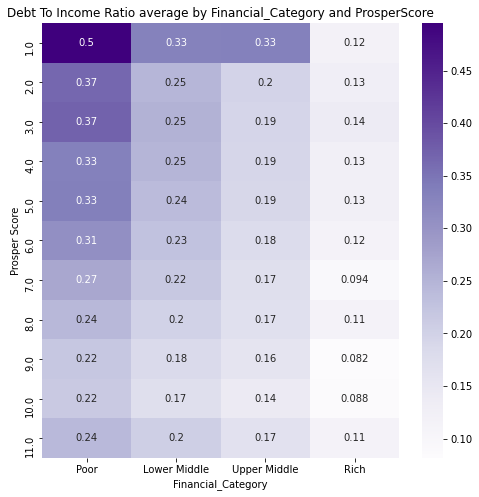

In [50]:
heatmap_df2 = df_loanCopy.groupby(['ProsperScore','Financial_Category']).DebtToIncomeRatio.mean().reset_index()
heatmap_data2 = heatmap_df2.pivot('ProsperScore','Financial_Category','DebtToIncomeRatio')
fig, ax = plt.subplots(figsize=(8, 8))
ax = sb.heatmap(heatmap_data2,ax=ax, annot=True,cmap="Purples")
ax.set_title('Debt To Income Ratio average by Financial_Category and ProsperScore')
ax.set_xlabel('Financial_Category')
ax.set_ylabel('Prosper Score')

#### Dept to Income Ratio keeps getting better (lower) as we move from Poor to Rich Category
#### Finacial Category does not actually define the prosper score so may be Income range is not a key factor to identify risky/non risky Loans 

## Multivariate Exploration Analysis

### To check if there is any correlation between Borrower Rate , Estimated Return and Financial Category
#### As the Financial Category improves from poor to Upper Middle the borrower rate reduces i.e for Poor category the Borrower rate is higher than Upper Middle Class
#### Estimated Returns from the Poor Category is High as the Borrower Rate is high for them

### To check if there is any correlation between Borrower Rate , Dept To Income Ratio and Financial Category
#### Dept to Income Ratio is quite high for the Poor class as compared to the Upper Middle Class people as expected and as the Borrower Rate increases this ratio increases exponentially

### To check if there is any correlation between Stated Monthly Salary, Dept To Income Ratio, Credit Grade
#### High Credit Grade People are usually with Higher salary range and with less DeptToIncomeRatio while the lower credit grade people have usually less income and hugher DeptToIncomeRatio This looks relatable

#### To check if there is any correlation between Borrower Rate , Estimated Return and Prosper Score
#### Borrower rate influences Estimated Returns for sure but the Prosper Score demarcation is very significantly represented in this graph which shows that it also has a correlation with other two parameters
#### The lowest Borrower Rate(0.05-0.12) are with lowest risk score (Best Risk Score 10) and also the estimated Returns are reasonably good (upto 0.1)
#### For medium Risk Score (Prosper Score between 4-6) the Estimated Returns is Maximum (upto 0.2) and the Borrower rate is little higher (0.12 - 0.25)
#### For High Risk Score (Prosper Score 2) the Estimated Returns is very low and the Borrower rate is on higher range (0.2 - 0.35)


### To check if there is any correlation between Income Range, Loan Status with Prosper Score
#### Prosper Score is best for the loans where the status is Completed and it actually the prosper score does not depend on the Income Range even the higher income range people will have lower prosper score and ViceVersa


### To check if there is any correlation between Prosper Score, Dept To Income Ratio with Financial Category
#### Dept to Income Ratio keeps getting better (lower) as we move from Poor to Rich Category
#### Finacial Category does not actually define the prosper score so may be Income range is not a key factor to identify risky/non risky Loans 

## Thank You 